Author: Kazi Amit Hasan <br>
Department of Computer Science & Engineering,<br>
Rajshahi University of Engineering & Technology (RUET)<br>
Website: https://amithasanshuvo.github.io/<br>
Linkedin: https://www.linkedin.com/in/kazi-amit-hasan-514443140/<br>
Email: kaziamithasan89@gmail.com

<hr>
References:
1. https://www.kaggle.com/codeblogger/convolutional-neural-network-cnn-tutorial
2. https://www.kaggle.com/rushikesh0203/mnist-sign-language-recognition-cnn-99-94-accuracy

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
train=pd.read_csv('/kaggle/input/sign-language-mnist/sign_mnist_train.csv')
test=pd.read_csv('/kaggle/input/sign-language-mnist/sign_mnist_test.csv')

In [4]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB


In [7]:
train.shape

(27455, 785)

In [8]:
test.shape

(7172, 785)

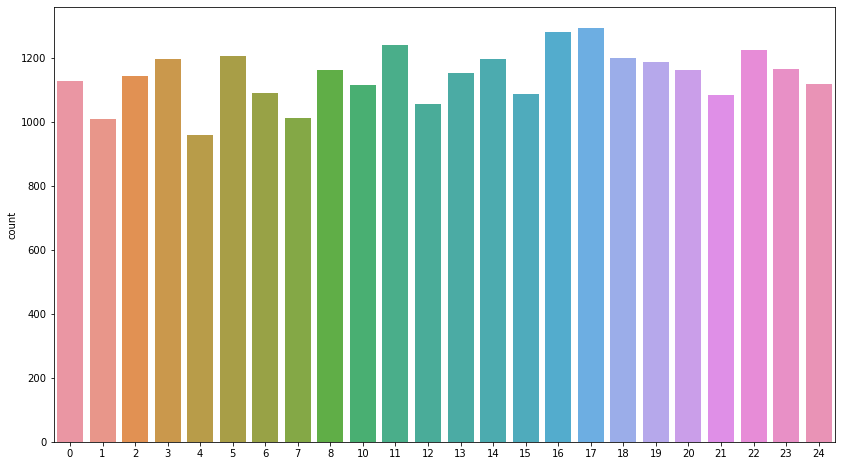

In [9]:
labels = train['label'].values
plt.figure(figsize = (14,8))
sns.countplot(x =labels)

In [10]:

X_train = train.drop(["label"],axis=1)
X_test = test.drop(["label"],axis=1)
Y_train = train['label']
Y_test = test['label']
del train['label']
del test['label']

In [11]:
X_train = X_train/255.0
X_test = X_test/255.0
X_train.shape
X_test.shape

(7172, 784)

In [12]:
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)
X_train.shape
X_test.shape

(7172, 28, 28, 1)

In [13]:
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()
Y_train = label_binrizer.fit_transform(Y_train)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (21964, 28, 28, 1)
x_test shape (5491, 28, 28, 1)
y_train shape (21964, 24)
y_test shape (5491, 24)


In [29]:
from sklearn.metrics import confusion_matrix
import itertools
import tensorflow as tf

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


model = tf.keras.models.Sequential([
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu',padding = 'same', input_shape=(28, 28, 1)),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(128, (3, 3),padding = 'same', activation='relu'),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(512, (3, 3),padding = 'same', activation='relu'),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        
                        tf.keras.layers.Conv2D(512, (3, 3),padding = 'same', activation='relu'),
                        tf.keras.layers.Flatten(),
                        tf.keras.layers.Dense(512, activation='relu'),
                        tf.keras.layers.Dense(24, activation='softmax')])
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 7, 7, 512)         590336    
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 3, 3, 512)         0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 3, 3, 512)       

In [30]:
#optimizer = Adam(lr=0.003, beta_1=0.9, beta_2=0.999)

model.compile( optimizer='rmsprop' , loss = "categorical_crossentropy", metrics=["accuracy"])

In [31]:
epochs = 50 
batch_size = 200


In [32]:
#Data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False, 
        zca_whitening=False,
        rotation_range=15, 
        zoom_range = 0.5,
        width_shift_range=0.15,  
        height_shift_range=0.15, 
        horizontal_flip=True,  
        vertical_flip=False)  

datagen.fit(X_train)

In [33]:
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

Train for 109 steps, validate on 5491 samples
Epoch 1/50
109/109 [==============================] - 8s 74ms/step - loss: 3.2108 - accuracy: 0.0594 - val_loss: 3.0205 - val_accuracy: 0.1195
Epoch 2/50
109/109 [==============================] - 7s 63ms/step - loss: 2.8080 - accuracy: 0.1473 - val_loss: 2.2594 - val_accuracy: 0.3107
Epoch 3/50
109/109 [==============================] - 7s 61ms/step - loss: 2.3211 - accuracy: 0.2702 - val_loss: 1.6354 - val_accuracy: 0.4507
Epoch 4/50
109/109 [==============================] - 7s 67ms/step - loss: 1.8312 - accuracy: 0.4089 - val_loss: 1.1040 - val_accuracy: 0.6536
Epoch 5/50
109/109 [==============================] - 7s 63ms/step - loss: 1.4183 - accuracy: 0.5321 - val_loss: 0.6352 - val_accuracy: 0.8126
Epoch 6/50
109/109 [==============================] - 7s 61ms/step - loss: 1.0644 - accuracy: 0.6440 - val_loss: 0.3485 - val_accuracy: 0.8911
Epoch 7/50
109/109 [==============================] - 7s 63ms/step - loss: 0.8312 - accuracy: 0.

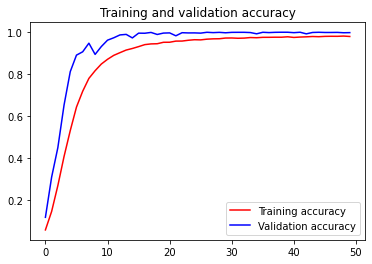

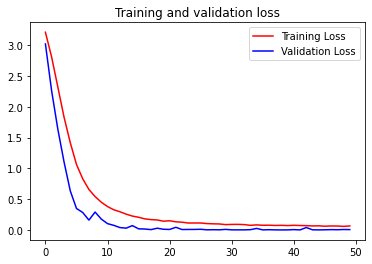

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()